In [10]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.7975
Training Time: 0.002005 seconds
Prediction Time: 0.000998 seconds


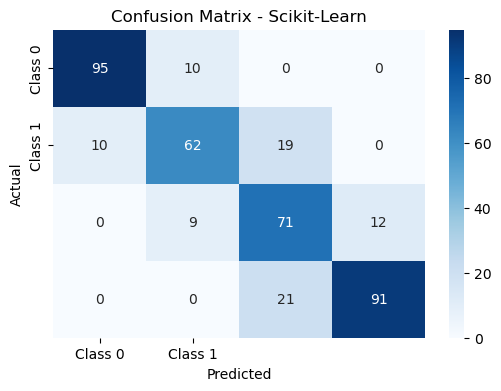

In [11]:
df = pd.read_csv(r"C:\Users\FURKAN\Downloads\archive (5)\train.csv")

X = df.iloc[:, :-1].values  #son sütun hariç tüm sütunlar
y = df.iloc[:, -1].values  #son sütun (classification)

#veri setini %80 train %20 test olarak ayırır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli başlat
bayesModel = GaussianNB()

# Modeli eğit ve süreyi ölç
start_time = time.time()
bayesModel.fit(X_train, y_train) #modeli eğitir
fit_time = time.time() - start_time #train süresini ölçer

# Test aşamasını ölç
start_time = time.time()
y_pred = bayesModel.predict(X_test) #modelin doğruluğunu ölçer
predict_time = time.time() - start_time #test süresini ölçer

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred) #modelin doğruluğunu ölçer
conf_matrix = confusion_matrix(y_test, y_pred) #karmaşıklık matrisini oluşturur

# Sonuçları göster
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {fit_time:.6f} seconds")
print(f"Prediction Time: {predict_time:.6f} seconds")

#karmaşıklık matrisini çizer
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Scikit-Learn")
plt.show()